In [74]:
import librosa
import librosa.display
import IPython
import numpy as np
import pandas as pd
import scipy as sp
import sklearn
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 600
plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['savefig.transparent'] = True
plt.rcParams['savefig.bbox']='tight'

In [273]:
amostra1 = "amostrasVerbo/f1-l2/"
amostra2 = "amostrasVerbo/f1-l3/"
amostra3 = "amostrasVerbo/m1-l2/"
amostra4 = "amostrasVerbo/m1-l3/"
amostra5 = "amostrasVerbo/f1-l2/ale"

amostras = [amostra1, amostra2, amostra3, amostra4]
ID_sentimentos = ['ale', 'des', 'med', 'neu', 'rai', 'sur', 'tri']
sentimentos = ['Alegria', 'Desgosto', 'Medo', 'Neutro', 'Raiva', 'Surpresa', 'Tristeza']
caracteristicas = ['zcr', 'rmse', 'ch', 'cp', 'tn', 'ctt', 'sc', 'cg', 'sr', 'mfcc']

In [75]:
def load_audios(amostra):    
    df = pd.DataFrame()
    for i in range(7):
        x, fa = librosa.load(amostra  + ID_sentimentos[i] +'.wav', duration=2.0)
        df[sentimentos[i]] = x
    return df, fa

### Carregando as amostras

In [286]:
print("Carregando amostra f1-l2")
load_audios(amostras[0])

Carregando amostra f1-l2


(        Alegria  Desgosto      Medo    Neutro     Raiva  Surpresa  Tristeza
 0      0.000139 -0.000563 -0.002435 -0.001144  0.006698 -0.001778 -0.000761
 1     -0.000310 -0.000277 -0.002517  0.000370  0.010161 -0.001916 -0.000866
 2      0.000133 -0.000537  0.000146  0.001131  0.008416 -0.001298 -0.001503
 3      0.000997 -0.000250  0.001190 -0.001837  0.008352 -0.001577 -0.000918
 4      0.000918  0.000036  0.001008 -0.003410  0.007362 -0.001558 -0.000063
 ...         ...       ...       ...       ...       ...       ...       ...
 44095 -0.011012  0.014669 -0.025360 -0.142431  0.230200 -0.165488 -0.009439
 44096 -0.082881  0.022585 -0.020839 -0.164034  0.254189 -0.179161 -0.009386
 44097 -0.090657  0.042842 -0.011911 -0.185117  0.198587 -0.109036 -0.011201
 44098 -0.026729  0.069769 -0.012758 -0.193755  0.177555 -0.047627 -0.015241
 44099  0.033721  0.110273 -0.007168 -0.212397  0.251990 -0.123199 -0.019711
 
 [44100 rows x 7 columns],
 22050)

In [78]:
print("Carregando amostra f1-l3")
load_audios(amostras[1])

Carregando amostra f1-l3


(        Alegria  Desgosto      Medo    Neutro     Raiva  Surpresa  Tristeza
 0      0.000013  0.000269  0.000098  0.000097  0.001685 -0.000970 -0.000413
 1      0.000684  0.000099  0.007315 -0.000203  0.003037  0.000589 -0.001601
 2      0.002542 -0.000257  0.013563 -0.000388  0.001624  0.003190 -0.000880
 3      0.002814 -0.000774  0.012882 -0.000188 -0.000863  0.002977  0.000282
 4      0.002979 -0.000350  0.008576 -0.000005 -0.002204  0.001175  0.000619
 ...         ...       ...       ...       ...       ...       ...       ...
 44095  0.023857  0.010836 -0.034662 -0.000052  0.034162 -0.032403 -0.005329
 44096  0.008947  0.006935 -0.042594  0.000660  0.009421 -0.048305 -0.006515
 44097 -0.032292  0.006803 -0.012867 -0.005550 -0.010900 -0.044272 -0.004828
 44098  0.000331  0.002335  0.030006 -0.012402 -0.011402 -0.027859 -0.004432
 44099  0.062394  0.000729  0.039601 -0.025427 -0.002027 -0.009213 -0.004597
 
 [44100 rows x 7 columns],
 22050)

In [79]:
print("Carregando amostra m1-l2")
load_audios(amostras[2])

Carregando amostra m1-l2


(        Alegria  Desgosto      Medo    Neutro     Raiva  Surpresa  Tristeza
 0      0.002492  0.000771 -0.003528  0.000049 -0.002152  0.002556  0.007997
 1      0.004118  0.001670 -0.002753  0.000111 -0.004277  0.001095  0.005507
 2      0.007552 -0.000044  0.000407  0.000182 -0.002602  0.000886  0.005306
 3      0.003594  0.000327 -0.002255  0.000670 -0.003792  0.006467  0.006779
 4      0.001022  0.000163 -0.002732  0.000849 -0.004212  0.006426  0.002584
 ...         ...       ...       ...       ...       ...       ...       ...
 44095  0.090536  0.021912  0.323537 -0.076695 -0.244733 -0.047855 -0.312047
 44096  0.062383  0.012481  0.304846 -0.087433 -0.375509 -0.057421 -0.303582
 44097  0.043996  0.005669  0.097029 -0.110022 -0.451511 -0.060320 -0.295786
 44098  0.002431  0.001624  0.017637 -0.121469 -0.289954  0.003011 -0.274808
 44099 -0.043980  0.003289  0.098308 -0.118120 -0.257196  0.009791 -0.274964
 
 [44100 rows x 7 columns],
 22050)

In [236]:
print("Carregando amostra m1-l3")
load_audios(amostras[3])


Carregando amostra m1-l3


(        Alegria  Desgosto      Medo    Neutro     Raiva  Surpresa  Tristeza
 0     -0.001711  0.021995  0.000121  0.001042  0.004952  0.000143  0.003958
 1     -0.003222  0.024720 -0.001630  0.000145 -0.000088  0.000156  0.002945
 2     -0.003852  0.014752 -0.003733 -0.000009 -0.000558 -0.000106  0.001847
 3     -0.003228  0.009486 -0.001669  0.001118 -0.000135 -0.000042  0.005313
 4     -0.003524  0.002342 -0.001530  0.001480 -0.002377  0.000043  0.003439
 ...         ...       ...       ...       ...       ...       ...       ...
 44095  0.023362  0.282566  0.080444  0.054408  0.027457 -0.482108 -0.135136
 44096  0.029355  0.291701  0.089904 -0.086750 -0.054150 -0.496726 -0.125068
 44097  0.010806  0.295283  0.095495 -0.126960 -0.109547 -0.472417 -0.103236
 44098  0.008730  0.274696  0.094572  0.202220 -0.132403 -0.410888 -0.074865
 44099  0.011929  0.306712  0.114933 -0.066515 -0.084736 -0.397018 -0.053190
 
 [44100 rows x 7 columns],
 22050)

In [81]:
def FRI4SA(dataframe):
    sim = 1 - sp.spatial.distance.pdist(dataframe, metric = 'cosine')
    return np.abs(sp.stats.median_abs_deviation(sim, scale = 1/1.540681)/np.median(sim))

In [84]:
def feat_calc(df, feature, fs):
    sentimentos = ['Alegria', 'Desgosto', 'Medo', 'Neutro', 'Raiva', 'Surpresa', 'Tristeza']
    df_feat = pd.DataFrame()
    for i in range(7):
        if feature == 'zcr':
            ZCR = librosa.feature.zero_crossing_rate(df[sentimentos[i]].values)
            df_feat[sentimentos[i]] = ZCR[0]
        elif feature == 'rmse':
            RMSE = librosa.feature.rms(df[sentimentos[i]].values)
            df_feat[sentimentos[i]] = RMSE[0]
        elif feature == 'ch':
            CH = librosa.effects.harmonic(df[sentimentos[i]].values)
            df_feat[sentimentos[i]] = CH
        elif feature == 'cp':
            CP = librosa.effects.percussive(df[sentimentos[i]].values)
            df_feat[sentimentos[i]] = CP
        elif feature == 'tn':
            TN = librosa.feature.tonnetz(df[sentimentos[i]].values, sr=fs).flatten()
            df_feat[sentimentos[i]] = TN
        elif feature == 'ctt':
            CTT = librosa.feature.spectral_contrast(df[sentimentos[i]].values).flatten()
            df_feat[sentimentos[i]] = CTT
        elif feature == 'sc':
            SC = librosa.feature.spectral_centroid(df[sentimentos[i]].values)
            df_feat[sentimentos[i]] = SC[0]
        elif feature == 'cg':
            CG = librosa.feature.chroma_stft(df[sentimentos[i]].values)
            df_feat[sentimentos[i]] = CG[0]
        elif feature == 'sr':
            SR = librosa.feature.spectral_rolloff(df[sentimentos[i]].values)
            df_feat[sentimentos[i]] = SR[0]
        elif feature == 'mfcc':
            MFCC = librosa.feature.mfcc(df[sentimentos[i]].values).flatten()
            df_feat[sentimentos[i]] = MFCC
    return df_feat.T

In [272]:
# Calculando o indice de relevancia de característica  zero cross rate na mostra f1-l2.wav
x, fa = load_audios(amostras[0])
print(x)
resultado = feat_calc(x, 'zcr', fa)
print("o indice de relevancia é:",FRI4SA(resultado))


        Alegria  Desgosto      Medo    Neutro     Raiva  Surpresa  Tristeza
0      0.000139 -0.000563 -0.002435 -0.001144  0.006698 -0.001778 -0.000761
1     -0.000310 -0.000277 -0.002517  0.000370  0.010161 -0.001916 -0.000866
2      0.000133 -0.000537  0.000146  0.001131  0.008416 -0.001298 -0.001503
3      0.000997 -0.000250  0.001190 -0.001837  0.008352 -0.001577 -0.000918
4      0.000918  0.000036  0.001008 -0.003410  0.007362 -0.001558 -0.000063
...         ...       ...       ...       ...       ...       ...       ...
44095 -0.011012  0.014669 -0.025360 -0.142431  0.230200 -0.165488 -0.009439
44096 -0.082881  0.022585 -0.020839 -0.164034  0.254189 -0.179161 -0.009386
44097 -0.090657  0.042842 -0.011911 -0.185117  0.198587 -0.109036 -0.011201
44098 -0.026729  0.069769 -0.012758 -0.193755  0.177555 -0.047627 -0.015241
44099  0.033721  0.110273 -0.007168 -0.212397  0.251990 -0.123199 -0.019711

[44100 rows x 7 columns]
o indice de relevancia é: 0.17925213097583698


In [248]:
# Calculando o indice de relevancia de todas as características para as 4 amostras
index = [] # indices de relancia  
resultado = pd.DataFrame(index=['zcr', 'rmse', 'ch', 'cp', 'tn', 'ctt', 'sc', 'cg', 'sr', 'mfcc'])
for i in range(4):
    x, fa = load_audios(amostras[i])
    for j in caracteristicas: 
        index.append(FRI4SA(feat_calc(x, j, fa)))   
    


In [249]:
#mostrando o valor de FRI4SA para cada característica de todas as amostras 
print(index)

[0.17925213097583698, 0.25729598020745825, 26.655620561222154, 212.19085167761105, 5.711442939887002, 0.0101260115755397, 0.06948516582719086, 0.3001992918423692, 0.07928719557970863, 0.04878794698907929, 0.16033015668767364, 0.07951321568518556, 1.3363605148532571, 3.845143622817139, 1.4045576039535845, 0.008418126394431633, 0.09769240051744496, 0.21304160341739953, 0.045313691695894005, 0.08591430983958269, 0.24598731531171308, 0.15979887160079276, 3.1318416204603237, 24.238202931183636, 10.267927542377844, 0.010699177833592763, 0.09710374655747081, 0.10865352889916172, 0.09764181572636753, 0.05236510952345467, 0.33920288437098567, 0.09295637036136245, 38.88962965203924, 5.943250611228048, 4.2425227892844255, 0.004855106623480737, 0.1186898065368387, 0.20008825958098433, 0.07711610336521273, 0.04466640026741273]


In [216]:
# conferindo o total de indices
len(index)

40

In [218]:
#pegando o indices das amostras( 10 caracteristicas de cada amostra)

r_amostra1 = index[0:10]   #f1-l2
r_amostra2 = index[10:20]  #f1-l3
r_amostra3 = index[20:30]  #m1-l2
r_amostra4 = index[30:40]  #m1-l3

In [252]:
#designando as colunas do dataframe
resultado[1]=r_amostra1
resultado[2]=r_amostra2
resultado[3]=r_amostra3
resultado[4]=r_amostra4


In [253]:
#exibindo o resultado na tabela onde 1,2,3,4 são respectivamente "amostra1, amostra2, amostra3, amostra4"
resultado

,1,2,3,4
zcr,0.179252,0.160330,0.245987,0.339203
rmse,0.257296,0.079513,0.159799,0.092956
ch,26.655621,1.336361,3.131842,38.889630
cp,212.190852,3.845144,24.238203,5.943251
tn,5.711443,1.404558,10.267928,4.242523
ctt,0.010126,0.008418,0.010699,0.004855
sc,0.069485,0.097692,0.097104,0.118690
cg,0.300199,0.213042,0.108654,0.200088
sr,0.079287,0.045314,0.097642,0.077116
mfcc,0.048788,0.085914,0.052365,0.044666


<AxesSubplot:title={'center':'Amostra 1'}, xlabel='Features', ylabel='FRI4SA'>

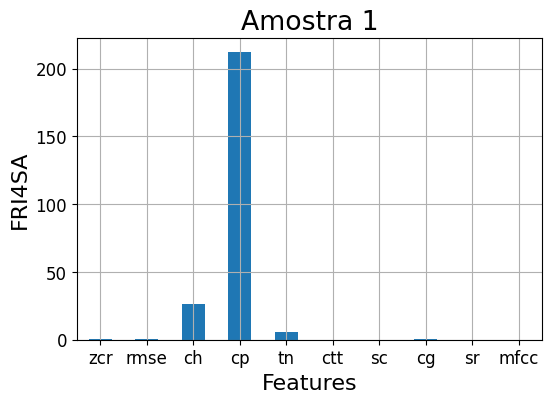

In [265]:
#plotando o gráfico para a amostra 1
resultado[1].plot.bar(title="Amostra 1", grid=True, legend=False, xlabel = 'Features', ylabel = 'FRI4SA', fontsize=12, rot=0)    

<AxesSubplot:title={'center':'Amostra 2'}, xlabel='Features', ylabel='FRI4SA'>

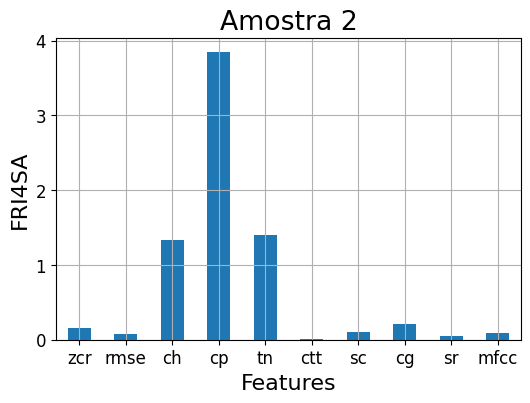

In [266]:
resultado[2].plot.bar(title="Amostra 2",grid=True, legend=False, xlabel = 'Features', ylabel = 'FRI4SA', fontsize=12, rot=0)

<AxesSubplot:title={'center':'Amostra 3'}, xlabel='Features', ylabel='FRI4SA'>

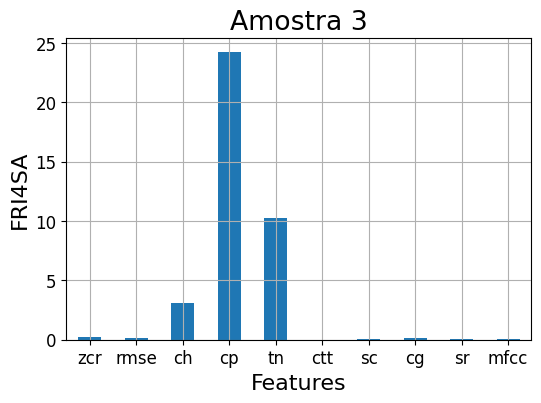

In [267]:
resultado[3].plot.bar(title="Amostra 3",grid=True, legend=False, xlabel = 'Features', ylabel = 'FRI4SA', fontsize=12, rot=0)

<AxesSubplot:title={'center':'amostra4'}, xlabel='Features', ylabel='FRI4SA'>

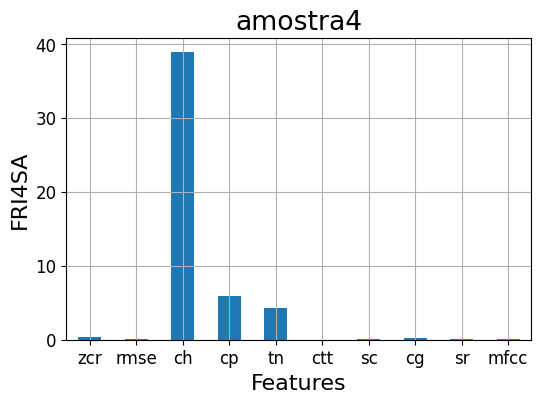

In [268]:
resultado[4].plot.bar(title="amostra4",grid=True, legend=False, xlabel = 'Features', ylabel = 'FRI4SA', fontsize=12, rot=0)